In [ ]:
#Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [ ]:
#Data

#BT Thermal
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/Train_BT_Heat_Rate.csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/Test_BT_Heat_Rate.csv'

#GF Immersion
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/Train_Geroge_Fox_Immersion_Heat(KWh)_Rate.csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/Test_George_Fox_Immersion_Heat(KWh)_Rate.csv'

# Temperature
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/Train_George_Fox_temp(DegC).csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/Test_George_Fox_temp(DegC).csv'

#GF B27 Thermal
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/Train_George_Fox_Thermal(KWh)_Rate.csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/Test_George_Fox_Thermal(KWh)_Rate.csv'

# BT Oc
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/BT_Oc_Train.csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/BT_Oc_Test.csv'

# Library Oc
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/Library_Train.csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/Library_Test.csv'

train = pd.read_csv(filepath1)
test = pd.read_csv(filepath2)
train.head()

,time,Associated Client Count
0,2018-08-20 00:00:00,33
1,2018-08-20 01:00:00,37
2,2018-08-20 02:00:00,38
3,2018-08-20 03:00:00,33
4,2018-08-20 04:00:00,36


In [ ]:
#Data Manipulation
train.columns = ['timestamp','reading']
test.columns = ['timestamp','reading']
train.timestamp = pd.to_datetime(train.timestamp)
test.timestamp = pd.to_datetime(test.timestamp)
train.set_index('timestamp', inplace=True)
test.set_index('timestamp', inplace=True)
#train = train.resample('1H').asfreq()
#test = test.resample('1H').asfreq()
#train = train.resample('1H').sum()
#test = test.resample('1H').sum()
test.dropna(inplace=True)
train.dropna(inplace=True)
train.tail()

,reading
timestamp,
2019-12-09 19:00:00,26992
2019-12-09 20:00:00,25062
2019-12-09 21:00:00,21944
2019-12-09 22:00:00,15728
2019-12-09 23:00:00,13128


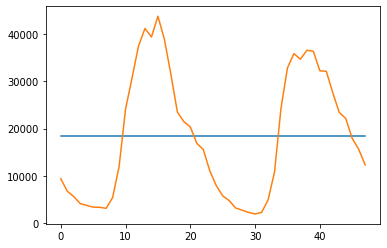

In [ ]:
fl = 48 #Forecast Length

bl = sum(test.iloc[:fl].reading)/test[:fl].shape[0]
model = [bl]*fl
model = np.array(model)
act = np.array(test.iloc[:fl])
plt.plot(model)
plt.plot(act)

In [ ]:
#MAE 
mae = mean_absolute_error(test.iloc[:fl], model)
mae

11880.625